<a href="https://colab.research.google.com/github/aj1365/Machine-Learning-Models/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
######### global parameters
num_classes=10
num_features=784  ## 28 by 28 image

########## Hyperparameters
learning_rate=0.001
training_steps=5000
batch_size=256

########### visualization
display_step=200

In [3]:
######## load data, convert them into arry, reshape them into 1-D vector, and finally do data normaliation [0, 1]
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()

x_train, x_test= np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test= x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test= x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
############### creating data holder (mini-batches)
train_data=tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [5]:
############### Initialize learnable variables
randomnormal= tf.initializers.RandomNormal()
W= tf.Variable(randomnormal([num_features, num_classes]), name="weight")
b= tf.Variable(tf.zeros([num_classes]), name="bias")

########## classifier

def logistic_regression(x):
    return tf.nn.softmax(tf.add(tf.matmul(x, W), b))

############# loss function
def cross_entropy(y_pred, y_true):

    y_true=tf.one_hot(y_true, depth=num_classes)

    y_pred=tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum( y_true * tf.math.log(y_pred)))

############### model validation algorithm
def accuracy(y_pred, y_true):

    correct_prediction=tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast (correct_prediction, tf.float32))

############ optimizer
optimizer=tf.optimizers.SGD(learning_rate)

In [6]:
############## optimization process

def run_optimization(x, y):

    with tf.GradientTape() as g:

        pred=logistic_regression(x)
        loss=cross_entropy(pred, y)


    gradients=g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    return

In [7]:
################## training process

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps ),1):

    run_optimization(batch_x, batch_y)


    if step % display_step ==0:

        pred=logistic_regression(batch_x)
        loss=cross_entropy(pred, batch_y)
        acc=accuracy(pred, batch_y)

        print("step: %i, loss: %f, accuracy: %f"% (step, loss, acc))

step: 200, loss: 99.747711, accuracy: 0.890625
step: 400, loss: 89.047295, accuracy: 0.890625
step: 600, loss: 72.605446, accuracy: 0.910156
step: 800, loss: 88.941055, accuracy: 0.906250
step: 1000, loss: 65.747383, accuracy: 0.929688
step: 1200, loss: 63.517178, accuracy: 0.929688
step: 1400, loss: 53.701229, accuracy: 0.933594
step: 1600, loss: 91.347786, accuracy: 0.906250
step: 1800, loss: 72.825905, accuracy: 0.933594
step: 2000, loss: 76.561813, accuracy: 0.921875
step: 2200, loss: 85.434189, accuracy: 0.925781
step: 2400, loss: 53.670883, accuracy: 0.945312
step: 2600, loss: 49.055405, accuracy: 0.945312
step: 2800, loss: 65.820732, accuracy: 0.921875
step: 3000, loss: 76.920685, accuracy: 0.894531
step: 3200, loss: 62.722580, accuracy: 0.914062
step: 3400, loss: 57.895237, accuracy: 0.945312
step: 3600, loss: 54.719067, accuracy: 0.957031
step: 3800, loss: 65.722038, accuracy: 0.906250
step: 4000, loss: 63.330154, accuracy: 0.933594
step: 4200, loss: 61.486515, accuracy: 0.941

In [8]:
############ model validation
pred=logistic_regression(x_test)
print("accuracy: %f"% accuracy(pred, y_test))

accuracy: 0.923500


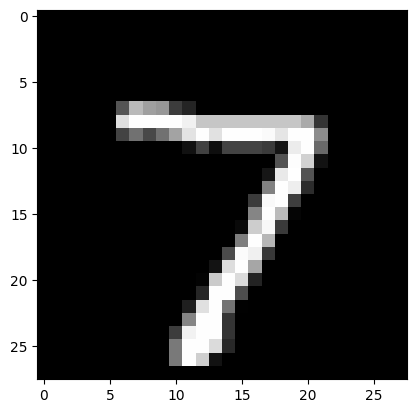

 Predicted class : 7


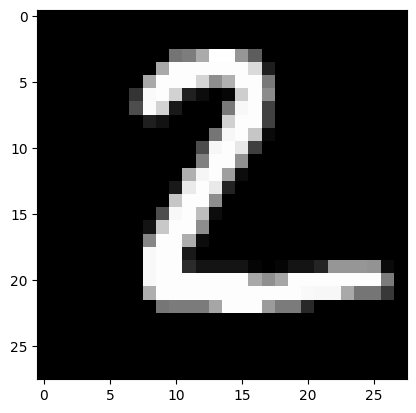

 Predicted class : 2


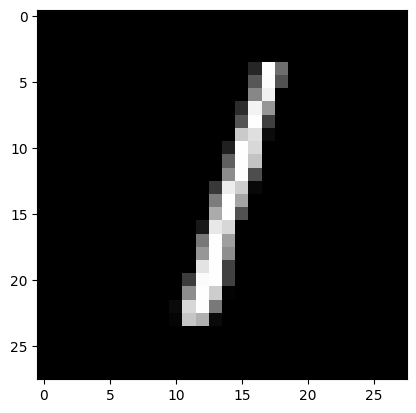

 Predicted class : 1


In [9]:
############## visualization

n_images=3
images=x_test[:n_images]
prediction=logistic_regression(images)


for i in range(n_images):

    plt.imshow(np.reshape(images[i], [28 , 28]), cmap='gray')
    plt.show()
    print(" Predicted class : %i" % np.argmax(prediction[i]))
